# 8월 17일

- 데이터 합치기(pandas.concat())
- 외부 데이터로 저장하기 (txt, csv, xlsx)
- 탐색적 데이터 분석(EDA)  
(1) 일변량 질적 자료의 분석  
(2) 일변량 양적 자료의 분석

In [1]:
import numpy as np
import pandas as pd

In [2]:
diamonds = pd.read_excel("/SBA/diamonds.xlsx",
                        sheet_name = 0,
                        header     = 0)

In [11]:
# (2) pandas.concat()
# i. 위 / 아래
# 2019년도 데이터, 2020년도 데이터
year2016 = diamonds.loc[0:5, ["x", "y", "z"]]
year2017 = diamonds.loc[6:10, ["x", "y", "z"]]
year_all = pd.concat(objs = [year2016, year2017], axis = 0)

In [12]:
year_all

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
5,3.94,3.96,2.48
6,3.95,3.98,2.47
7,4.07,4.11,2.53
8,3.87,3.78,2.49
9,4.00,4.05,2.39


In [14]:
# ii. 왼쪽 / 오른쪽
# 어떤 개체의 일부, 같은 개체의 또 다른 일부
# pandas.concat(objs = [data1, data2], axis = 1)
d1 = diamonds.loc[0:5, ["carat", "price"]]
d2 = diamonds.loc[0:5, ["x", "y", "z"]]
d_all = pd.concat(objs = [d1, d2], axis = 1)

In [15]:
d_all

,carat,price,x,y,z
0,0.23,326,3.95,3.98,2.43
1,0.21,326,3.89,3.84,2.31
2,0.23,327,4.05,4.07,2.31
3,0.29,334,4.20,4.23,2.63
4,0.31,335,4.34,4.35,2.75
5,0.24,336,3.94,3.96,2.48


- - -

In [16]:
# 8. 외부 데이터로 저장하기
# 8.1 txt
# data.to_csv(path_or_buf = "directory/filename.txt",
#             sep         = " " or "," or "\t" ...,
#             header      = True,
#             index       = False)
diamonds.to_csv(path_or_buf = "d:/SBA/diamonds_0817.txt",
                sep         = ",",
                header      = True,
                index       = False)

In [17]:
# 8.2 csv
# data.to_csv(path_or_buf = "directory/filename.csv",
#             header      = True,
#             index       = False)
diamonds.to_csv(path_or_buf = "d:/SBA/diamonds_0817.csv",
                header      = True,
                index       = False)

In [21]:
# 8.3 xls, xlsx
# data.to_excel(excel_writer = "directory/filename.xlsx",
#               sheet_name   = "name",
#               header       = True,
#               index        = False)
diamonds.to_excel(excel_writer = "d:/SBA/diamonds_0817.xlsx",
                  sheet_name   = "data",
                  header       = True,
                  index        = False)

- - -

# 탐색적 데이터 분석(EDA)

## Exploratory Data Analysis

### 1. 일변량 질적 자료(범주형 자료)의 분석

- 일변량(Uni-Variate) = 하나의 열(Column) = 하나의 변수(Variable)
- 하나의 Feature = 하나의 Label

1.1 표(Table) = 빈도표(Frequency Table)
- (1) 빈도(Frequency)
- (2) 백분율(Percent) : (빈도 / 합계) * 100

1.2 그래프(Graph)
- (1) 막대 그래프(bar plot)
- (2) 원 그래프(pie chart)

In [27]:
# 1.1 (1) 빈도
# data["variable"].value_counts(ascending = False)
# data.variable.value_counts()
diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [28]:
diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [29]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [32]:
# 1.1 (2) 백분율(Percent)
diamonds.cut.value_counts(normalize = True) * 100

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64

In [33]:
# 반올림 (특별하지 않으면 백분율의 최종 소수점 자리수는 한 자리)
round(diamonds.cut.value_counts(normalize = True) * 100, 1)

Ideal        40.0
Premium      25.6
Very Good    22.4
Good          9.1
Fair          3.0
Name: cut, dtype: float64

In [42]:
color_frequency = diamonds.color.value_counts(ascending = False)
color_percent   = round(diamonds.color.value_counts(normalize = True, ascending = False) * 100, ndigits = 1)

In [43]:
color_frequency

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [44]:
color_percent

G    20.9
E    18.2
F    17.7
H    15.4
D    12.6
I    10.1
J     5.2
Name: color, dtype: float64

In [45]:
color = pd.DataFrame({"frequency" : color_frequency, "percennt" : color_percent})

In [46]:
color

,frequency,percennt
G,11292,20.9
E,9797,18.2
F,9542,17.7
H,8304,15.4
D,6775,12.6
I,5422,10.1
J,2808,5.2


In [47]:
# 문제
# color 데이터를 엑셀 파일로 저장하세요. (이름 : color_0817.xlsx)
color.to_excel(excel_writer = "d:/SBA/color_0817.xlsx",
               sheet_name   = "data",
               header       = True,
               index        = False)

In [49]:
# 그래프 (i. 막대 그래프)
# matplotlib.pyplot
import matplotlib.pyplot as plt

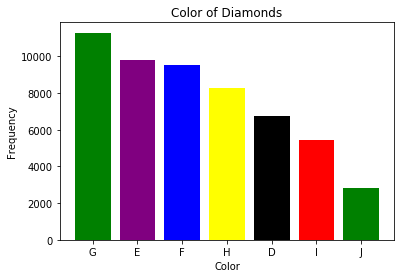

In [74]:
plt.bar(x = color_frequency.index, height = color_frequency, color = ["green", "purple", "blue", "yellow", "black", "#ff0000"])
plt.title("Color of Diamonds")
plt.xlabel("Color")
plt.ylabel("Frequency")
plt.show()

In [78]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [79]:
clarity_frequency = diamonds.clarity.value_counts()

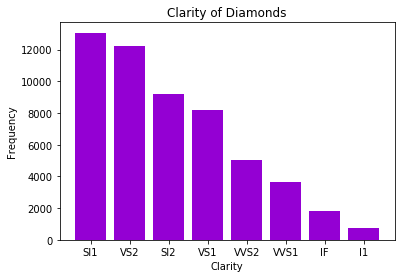

In [81]:
plt.bar(x      = clarity_frequency.index, 
        height = clarity_frequency, 
        color  = ["darkviolet"])
plt.title("Clarity of Diamonds")
plt.xlabel("Clarity")
plt.ylabel("Frequency")
plt.show()

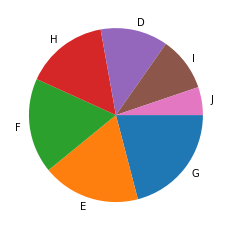

In [95]:
# 그래프 (ii. 원 그래프)
# plt.pie(x            = 빈도 또는 백분율,
#         labels        = index,
#         radius       = 반지름,
#         counterclock = True or False,
#         startangle   = 0 ~ 360)
plt.pie(x            = color_frequency,
        labels        = color_frequency.index,
        counterclock = False,
        startangle   = 0)
plt.show()

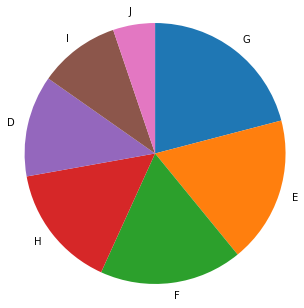

In [94]:
# 첫 번째 원 조각의 시작 각도
plt.pie(x            = color_frequency,
        labels        = color_frequency.index,
        radius       = 1.5,
        counterclock = False,
        startangle   = 90)
plt.show()

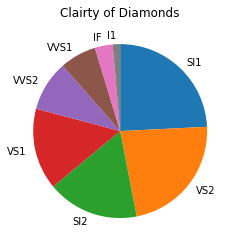

In [97]:
plt.pie(x            = clarity_frequency,
        labels       = clarity_frequency.index,
        radius       = 1,
        counterclock = False,
        startangle   = 90)
plt.title("Clairty of Diamonds")
plt.show()

- - -

## 2. 일변량 양적 자료(수치형 자료)의 분석
**2.1 표 = 빈도표**
- (1) 구간의 빈도
- (2) 구간의 백분율

**2.2 그래프**
- (1) 히스토그램(Histogram)
- (2) 상자그림(Boxplot)

**2.3 기술통계량 = 요약통계량**
- (1) 중심 = 대표값
- (2) 퍼짐 = 산포 = 다름
- (3) 분포의 모양

In [99]:
# 문제
# price -> price_group
# 0 ~ 5000 -> "Very Cheap"
# 5000 ~ 10000 -> "Cheap"
# 10000 ~ 15000 -> "Expensive"
# 15000 ~ 20000 -> "Very Expensive"
diamonds["price_group"] = pd.cut(diamonds.price,
                                bins   = [0, 5000, 10000, 15000, 20000],
                                right  = False,
                                labels = ["Very Cheap", "Cheap", "Expensive", "Very Expensive"])

,carat,cut,color,clarity,depth,table,price,x,y,z,price_group
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Very Cheap
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Very Cheap
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Very Cheap
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Very Cheap
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,Very Cheap


In [100]:
price_group_frequency = diamonds.price_group.value_counts()
price_group_percent   = round(diamonds.price_group.value_counts(normalize = True, ascending = False) * 100, ndigits = 1)

In [101]:
price_group_frequency

Very Cheap        39213
Cheap              9504
Expensive          3567
Very Expensive     1656
Name: price_group, dtype: int64

In [102]:
price_group_percent

Very Cheap        72.7
Cheap             17.6
Expensive          6.6
Very Expensive     3.1
Name: price_group, dtype: float64

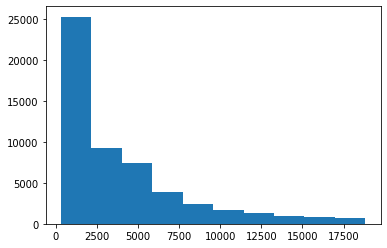

In [103]:
# 2.2 그래프(Graph)
# (1) 히스토그램(Histogram)
# plt.hist(x = 양적 자료,
#          bins = 구간의 정보 : 구간, 구간의 개수)
# plt.show()
plt.hist(x = diamonds.price)
plt.show()

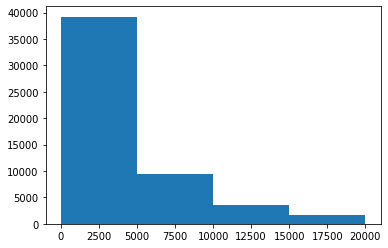

In [104]:
# 구간의 정보 : bins
plt.hist(x = diamonds.price,
         bins = [0, 5000, 10000, 15000, 20000])
plt.show()

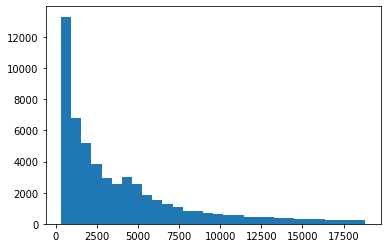

In [108]:
# 구간의 개수 : bins
plt.hist(x = diamonds.price,
         bins = 30)
plt.show()

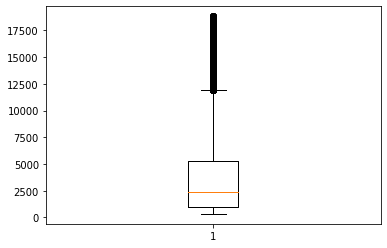

In [109]:
# (2) 상자그림(Box plot)
# plt.boxplot(x    = 양적 자료,
#             vert = True or False,
#             whis = 1.5)
# plt.show()
plt.boxplot(x    = diamonds.price)
plt.show()

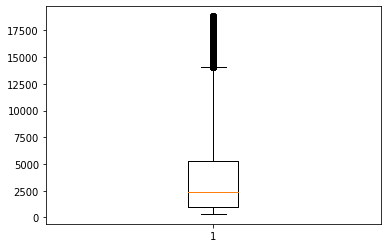

In [111]:
# wish = 1.5 : 1.5*IQR
# whis = 2
plt.boxplot(x    = diamonds.price,
            vert = True,
            whis = 2)
plt.show()

### 2.3 기술통계량 = 요약통계량 = 수치
- (1) 중심 = 대표값
- (2) 퍼짐 = 산포 = 다름
- (3) 분포의 모양

(1) 중심 = 대표값 : 평균, 절사평균, 중위수, 최빈수

In [112]:
# i. 평균(Mean, Average)
# 시계열 데이터 분석(Time Seris Data Analysis)
# 이동 평균 (Moving Average : MA) - ARIMA

# numpy.mean(양적 자료)
np.mean(diamonds.price)

3932.799721913237

In [117]:
# ii. 중위수 = 중앙값(Median)
# numpy.median(양적 자료)
np.median(diamonds.price)

2401.0

**데이터의 평균과 중위값이 차이가 많이 난다. 이상치가 있다.**

(2) 퍼짐 = 산포 = 다름 : 범위, 사분위범위, 분산, 표준편차, 중위수절대편차

In [118]:
# i. 범위(range)
# numpy.max(양적 자료) - numpy.min(양적 자료)
np.max(diamonds.price) - np.min(diamonds.price)

18497

In [119]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64